# Линейная регрессия
__Суммарное количество баллов: 10__


In [1]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib
import copy
from numpy import linalg as LA

In [2]:
def read_data(path="data/boston.csv"):
    dataframe = np.genfromtxt(path, delimiter=",", skip_header=15)
    print(dataframe)
    X = dataframe[:, :-1]
    y = dataframe[:, -1]
    
    return X, y

# то, что выше, читает оч странно, и не пододит, потому что лейблы упускает(например спамовые)
# поэтому применю свой рид
def read_dataset(path_to_csv, cancer = False, split = False, train_size = 0.8, random_state = None):
    data = pd.read_csv(path_to_csv)
    if cancer:
        data['label'] = (data['label'] == 'M').astype(int)
    X = data.drop("label", axis=1).to_numpy()
    y = data.label.to_numpy()
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    if not split:
        return X, y

In [3]:
def generate_synthetic(size, dim=6, noise=0.1):
    X = np.random.randn(size, dim)
    w = np.random.randn(dim + 1)
    noise = noise * np.random.randn(size)
    y = X.dot(w[1:]) + w[0] + noise
    return X, y

### Задание 1 (1 балл)
Для начала нужно понять, какую метрику для ошибки будем использовать. В нашем случае нам подойдет стандартная метрика MSE. Ее и нужно реализовать.

In [4]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

### Задание 2 (3 балла)
Теперь реализуем линейную регрессию при помощи явного решения задачи минимизации. 

#### Методы
`fit(X, y)` - решает задачу минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$. 

`predict(X)` - строит предсказание `y` для объектов из `X`.

In [5]:
class NormalLR:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.w = LA.inv(X.transpose() @ X) @ X.transpose() @ y
    
    def predict(self, X):
        return X @ self.w[1:] + self.w[0]

In [6]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [7]:
regr = NormalLR()
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))

0.011073622882480913


### Задание 3 (2 балла)
Теперь реализуем линейную регрессию с использованием градиентного спуска с larning rate `alpha` в течении `iterations` итераций.

#### Методы
`fit(X, y)` - приближает решение задачи минимизации $\arg\min_{w, b}\sum ((w\cdot x + b) - y)^2$ при помощи градиентного спуска. 


`predict(X)` - строит предсказание `y` для объектов из `X`.

### Задание 4 (2 балла)
Добавьте в метод `fit` регуляризацию Лассо с коэффициентом `l`. Постройте график зависимости ошибки предсказания данных из синтетического набора данных от коэффициента регуляризации.

In [8]:
from random import randint

class GradientLR:
    def __init__(self, alpha, iterations=10000, l=0.):
        self.w = None
        self.alpha = alpha
        self.iterations = iterations
        self.l = l
    
    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        X_trans = X.T
        self.w = np.ones(X.shape[1])*-1
        for _ in range(self.iterations):
            self.w -= self.alpha * (2 / X.shape[0]) * (X_trans @ (X @ self.w - y)) + self.l * np.sign(self.w)

    def predict(self, X):
        return X @ self.w[1:] + self.w[0]


In [9]:
def build_plot(X_train, y_train, X_test, y_test, alpha = 0.001, times = 100, iterations = 10000):
    xs = [i/times for i in range(times+1)]
    ys = []
    for x in xs:
        print(x, end = ' ')
        regr = GradientLR(alpha, iterations=iterations, l=x)
        regr.fit(X_train, y_train)
        ys.append(mse(y_test, regr.predict(X_test)))
    plt.plot(xs, ys)
    y_label = plt.ylabel('Error', fontsize=12)
    x_label = plt.xlabel('Regularization coefficient', fontsize=12)
    plt.show()

In [10]:
X, y = generate_synthetic(1024)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

0.011218154115702138
0.0 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4 0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.0 

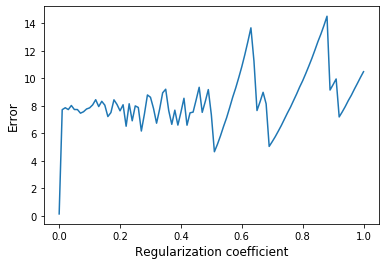

In [11]:
regr = GradientLR(0.001, iterations=10000)
regr.fit(X_train, y_train)
print(mse(y_test, regr.predict(X_test)))
build_plot(X_train, y_train, X_test, y_test, alpha = 0.001, times = 100, iterations = 1000)

### Задание 5 (2 балла)
Протесируйте оба метода на данных cancer и spam, для градиентного спуска постройте график зависимости ошибки от коэффициента регуляризации. 

NormalLR:
mse = 0.05986875983440735
===
alpha = 0.01
GradientLR:
mse = 0.05993055516128206
0.0 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4 0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.0 

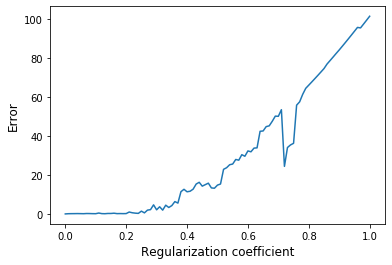

alpha = 0.001
GradientLR:
mse = 0.06018665500471531
0.0 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4 0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.0 

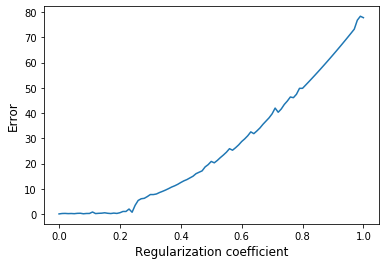

In [12]:
def draw_beauti(X_train, y_train, X_test, y_test, alpha):
    print(f'alpha = {alpha}')
    regr = GradientLR(alpha, iterations=10000)
    regr.fit(X_train, y_train)
    print(f'GradientLR:\nmse = {mse(y_test, regr.predict(X_test))}')
    build_plot(X_train, y_train, X_test, y_test, alpha = alpha, times = 100)


# import warnings; warnings.simplefilter('ignore')
X, y = read_dataset('data/cancer.csv', cancer = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
regr = NormalLR()
regr.fit(X_train, y_train)
print(f'NormalLR:\nmse = {mse(y_test, regr.predict(X_test))}\n===')
draw_beauti(X_train, y_train, X_test, y_test, 0.01)
draw_beauti(X_train, y_train, X_test, y_test, 0.001)

NormalLR:
mse = 0.1899640438920733
===
alpha = 0.01
GradientLR:
mse = 0.18989124675047217
0.0 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4 0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.0 

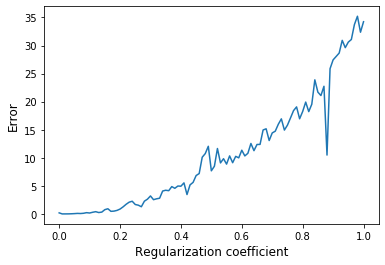

alpha = 0.001
GradientLR:
mse = 0.1895014466088715
0.0 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4 0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.0 

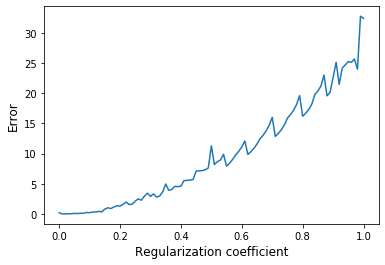

In [13]:
X, y = read_dataset('data/spam.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)
regr = NormalLR()
regr.fit(X_train, y_train)
print(f'NormalLR:\nmse = {mse(y_test, regr.predict(X_test))}\n===')
draw_beauti(X_train, y_train, X_test, y_test, 0.01)
draw_beauti(X_train, y_train, X_test, y_test, 0.001)